## Problem 1
Generate data from some $AR(p)$, $MA(q)$, and $ARMA(p, q)$ processes. Plot the graphs. Calculate and plot ACF, PACF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$X_{t} = 0.2X_{t-1} - 0.3X_{t-2} + W_t$

$\sigma = 1$

In [28]:
def AR(n):
    res = [np.random.normal(), np.random.normal(), np.random.normal()]
    for i in range(n-3):
        xt = 0.2*res[-1] - 0.3*res[-2] + np.random.normal()
        res.append(xt)
    return np.array(res)

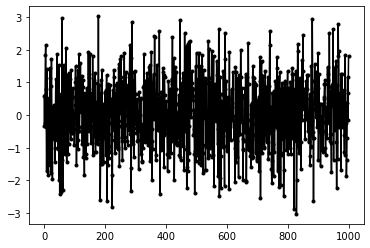

In [29]:
n = 1000
data = AR(n)
plt.plot(np.arange(n), data, 'k.-')
plt.show()

In [14]:
def ACF(data, max_lag=100):
    res = [np.sum(data**2)/data.size]
    for h in range(1, max_lag):
        cv = np.sum(data[:-h]*data[h:])/data.size
        res.append(cv)
    return np.array(res)

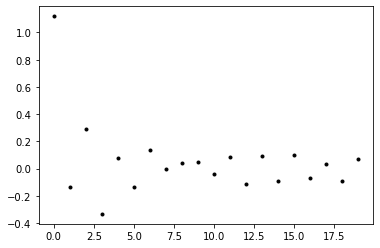

In [25]:
acf = ACF(data, 20)

plt.plot(np.arange(acf.size), acf, 'k.')
plt.show()

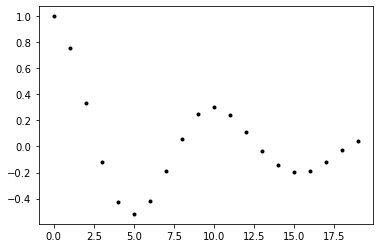

In [20]:
acc = acf/acf[0]

plt.plot(np.arange(acc.size), acc, 'k.')
plt.show()

In [17]:
import statsmodels.api as sm

/Users/maksimbolonkin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


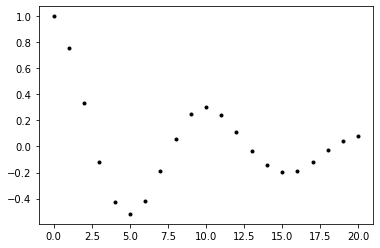

In [21]:
acf_values = sm.tsa.stattools.acf(data, nlags=20)

plt.plot(np.arange(acf_values.size), acf_values, 'k.')
plt.show()

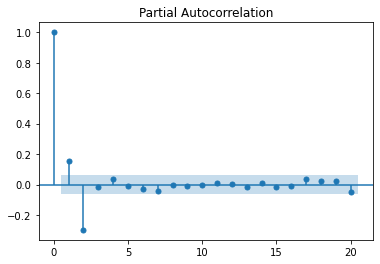

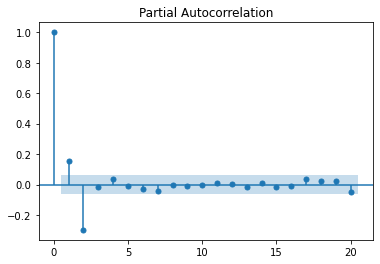

In [33]:
sm.graphics.tsa.plot_pacf(data, lags=20)